In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.optimizers import Adam

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df= pd.read_csv('customer_attrition.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
num_dup=df.duplicated().sum()
print("Number of duplicate value",num_dup)

Number of duplicate value 0


In [ ]:
df.drop(columns={'Surname','RowNumber','CustomerId'},axis=1,inplace=True)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype='int64',)

In [ ]:
X=df.drop(columns='Exited')
y=df['Exited']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
X.columns
X.shape

(10000, 11)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X_train.shape[1]

11

In [ ]:
from keras.metrics import Precision, Recall

Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7779 - loss: 2.3728e-08 - precision_18: 0.2567 - recall_18: 0.0610 - val_accuracy: 0.7765 - val_loss: 2.5338e-08 - val_precision_18: 0.3704 - val_recall_18: 0.0738
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7723 - loss: 2.4061e-08 - precision_18: 0.2302 - recall_18: 0.0558 - val_accuracy: 0.7765 - val_loss: 2.5338e-08 - val_precision_18: 0.3704 - val_recall_18: 0.0738
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7768 - loss: 2.3994e-08 - precision_18: 0.2759 - recall_18: 0.0690 - val_accuracy: 0.7765 - val_loss: 2.5338e-08 - val_precision_18: 0.3704 - val_recall_18: 0.0738
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7780 - loss: 2.3974e-08 - precision_18: 0.2781 - recall_18: 0.0658 - val_accuracy: 0.7765 - val_loss: 2.5338e-08 - val_precision_18: 0.3704 - val_recall_18: 0.0738
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7751 - loss: 2

/tmp/ipykernel_118571/2076683649.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


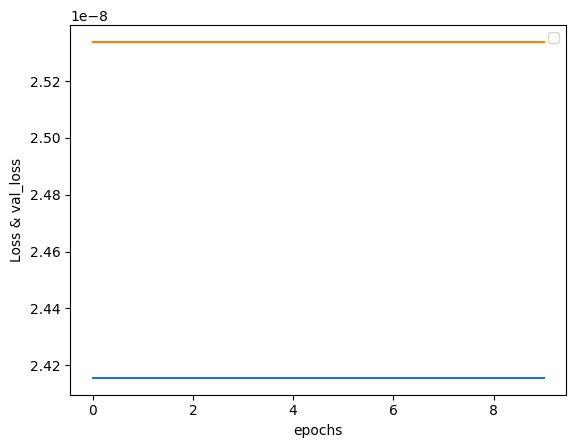

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7856 - loss: 2.4500e-08 - precision_18: 0.3671 - recall_18: 0.0615
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6660 - loss: 2.4502e-08 - precision_19: 0.1838 - recall_19: 0.1809 - val_accuracy: 0.6800 - val_loss: 2.5338e-08 - val_precision_19: 0.2158 - val_recall_19: 0.1919
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6656 - loss: 2.4511e-08 - precision_19: 0.1816 - recall_19: 0.1798 - val_accuracy: 0.6800 - val_loss: 2.5338e-08 - val_precision_19: 0.2158 - val_recall_19: 0.1919
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6612 - loss: 2.4245e-08 - precision_19: 0.1528 - recall_19: 0.1461 - val_accuracy: 0.6800 - val_loss: 2.5338e-08 - val_precision_19: 0.2158 - val_recall_19: 0.1919
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6600 - loss: 2.4033e-08 - precision_19: 0.1359 - recall_19: 0.1291 - val_accuracy: 0.6800 - val_loss: 2.5338e-08 - val_preci

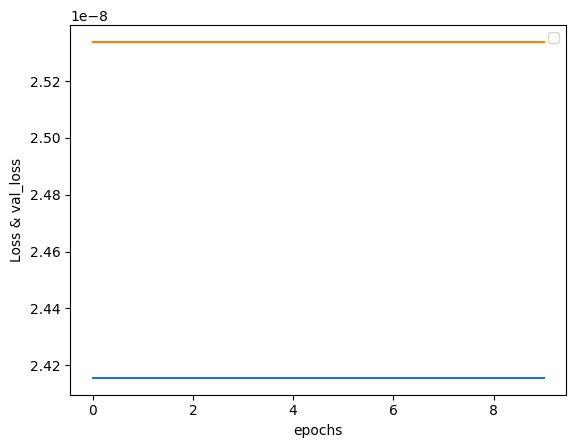

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6912 - loss: 2.4500e-08 - precision_19: 0.1998 - recall_19: 0.1673
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2038 - loss: 2.4289e-08 - precision_20: 0.2038 - recall_20: 1.0000 - val_accuracy: 0.2125 - val_loss: 2.5338e-08 - val_precision_20: 0.2125 - val_recall_20: 1.0000
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2012 - loss: 2.3987e-08 - precision_20: 0.2012 - recall_20: 1.0000 - val_accuracy: 0.2125 - val_loss: 2.5338e-08 - val_precision_20: 0.2125 - val_recall_20: 1.0000
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2031 - loss: 2.4213e-08 - precision_20: 0.2031 - recall_20: 1.0000 - val_accuracy: 0.2125 - val_loss: 2.5338e-08 - val_precision_20: 0.2125 - val_recall_20: 1.0000
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2033 - loss: 2.4231e-08 - precision_20: 0.2033 - recall_20: 1.0000 - val_accuracy: 0.2125 - val_loss: 2.5338e-08 - val_preci

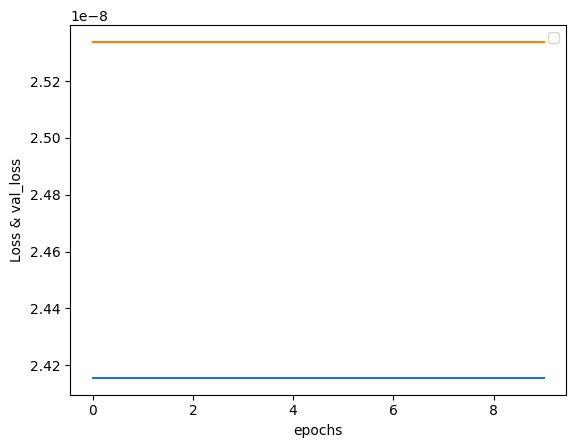

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2055 - loss: 2.4500e-08 - precision_20: 0.2055 - recall_20: 1.0000
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7983 - loss: 2.4068e-08 - precision_21: 0.7665 - recall_21: 0.0011 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_21: 0.0000e+00 - val_recall_21: 0.0000e+00
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 2.3599e-08 - precision_21: 0.8899 - recall_21: 0.0017 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_21: 0.0000e+00 - val_recall_21: 0.0000e+00
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 2.4378e-08 - precision_21: 0.7313 - recall_21: 0.0012 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_21: 0.0000e+00 - val_recall_21: 0.0000e+00
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7951 - loss: 2.4512e-08 - precision_21: 0.9868 - recall_21: 0.0035 - val_accuracy: 0.7875 - val_loss

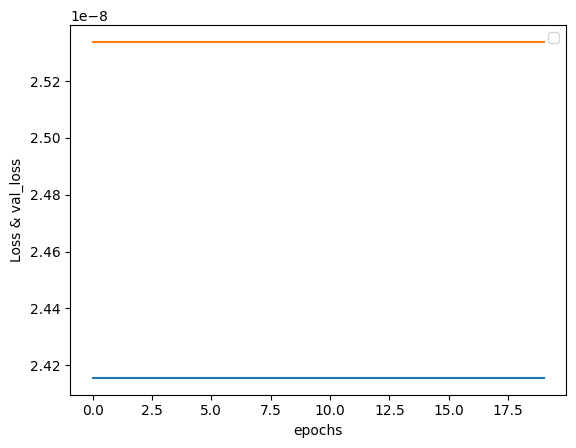

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 2.4500e-08 - precision_21: 0.0000e+00 - recall_21: 0.0000e+00
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8001 - loss: 2.3828e-08 - precision_22: 0.0000e+00 - recall_22: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_22: 0.0000e+00 - val_recall_22: 0.0000e+00
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7892 - loss: 2.5126e-08 - precision_22: 0.0000e+00 - recall_22: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_22: 0.0000e+00 - val_recall_22: 0.0000e+00
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 2.4360e-08 - precision_22: 0.0000e+00 - recall_22: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_22: 0.0000e+00 - val_recall_22: 0.0000e+00
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 2.3330e-08 - precision_22: 0.0000e+00 - recall_22: 0.00

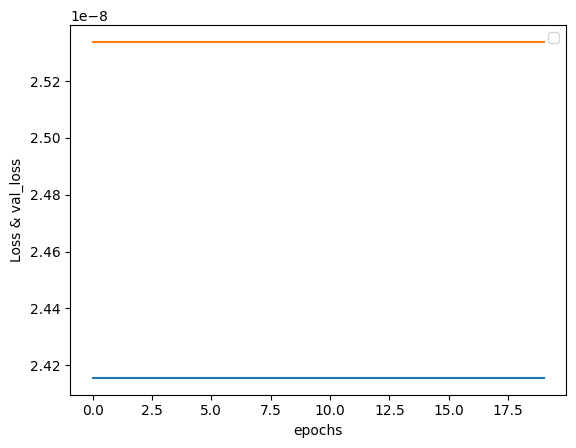

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 2.4500e-08 - precision_22: 0.0000e+00 - recall_22: 0.0000e+00
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8016 - loss: 2.3409e-08 - precision_23: 0.4432 - recall_23: 0.0457 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_23: 0.5000 - val_recall_23: 0.0517
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8036 - loss: 2.3096e-08 - precision_23: 0.4263 - recall_23: 0.0414 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_23: 0.5000 - val_recall_23: 0.0517
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7873 - loss: 2.4605e-08 - precision_23: 0.3361 - recall_23: 0.0320 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_23: 0.5000 - val_recall_23: 0.0517
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8081 - loss: 2.2651e-08 - precision_23: 0.4482 - recall_23: 0.0440 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - v

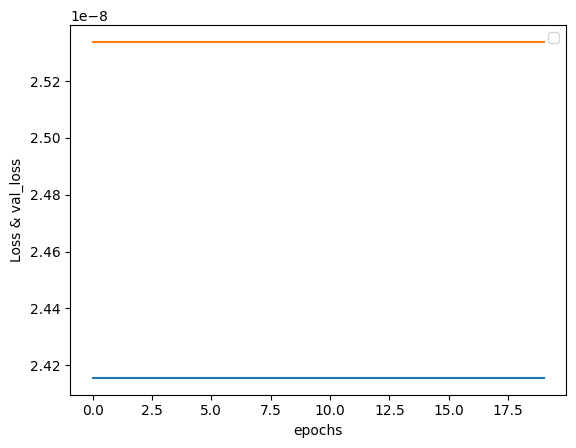

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7917 - loss: 2.4500e-08 - precision_23: 0.3696 - recall_23: 0.0297       
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7954 - loss: 2.4387e-08 - precision_24: 0.0000e+00 - recall_24: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_24: 0.0000e+00 - val_recall_24: 0.0000e+00
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7868 - loss: 2.5411e-08 - precision_24: 0.0000e+00 - recall_24: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_24: 0.0000e+00 - val_recall_24: 0.0000e+00
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 2.3637e-08 - precision_24: 0.0000e+00 - recall_24: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_24: 0.0000e+00 - val_recall_24: 0.0000e+00
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 2.4594e-08 - precision_24: 0.0000e+00 - recall_24: 0.000

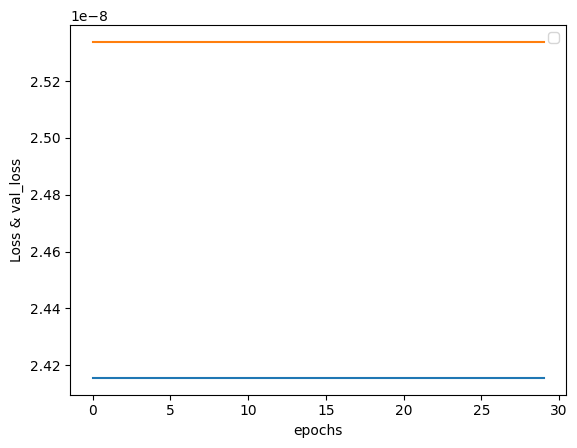

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 2.4500e-08 - precision_24: 0.0000e+00 - recall_24: 0.0000e+00
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8062 - loss: 2.3104e-08 - precision_25: 0.0000e+00 - recall_25: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_25: 0.0000e+00 - val_recall_25: 0.0000e+00
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7925 - loss: 2.4741e-08 - precision_25: 0.0000e+00 - recall_25: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_25: 0.0000e+00 - val_recall_25: 0.0000e+00
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 2.3924e-08 - precision_25: 0.0000e+00 - recall_25: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_25: 0.0000e+00 - val_recall_25: 0.0000e+00
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8000 - loss: 2.3842e-08 - precision_25: 0.0000e+00 - recall_25: 0.00

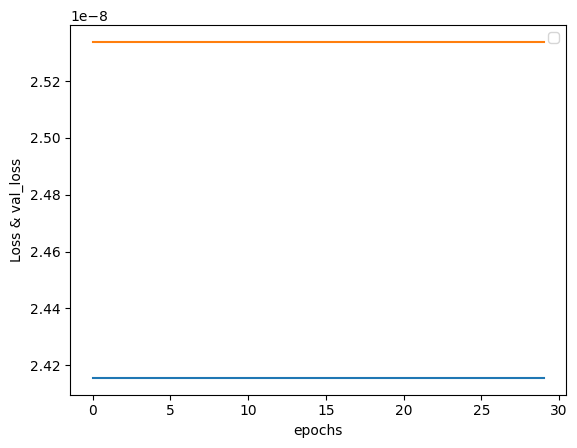

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 2.4500e-08 - precision_25: 0.0000e+00 - recall_25: 0.0000e+00
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4647 - loss: 2.3375e-08 - precision_26: 0.1810 - recall_26: 0.4911 - val_accuracy: 0.4580 - val_loss: 2.5338e-08 - val_precision_26: 0.1991 - val_recall_26: 0.5129
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4714 - loss: 2.4439e-08 - precision_26: 0.2006 - recall_26: 0.5286 - val_accuracy: 0.4580 - val_loss: 2.5338e-08 - val_precision_26: 0.1991 - val_recall_26: 0.5129
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4624 - loss: 2.4079e-08 - precision_26: 0.1911 - recall_26: 0.5154 - val_accuracy: 0.4580 - val_loss: 2.5338e-08 - val_precision_26: 0.1991 - val_recall_26: 0.5129
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4740 - loss: 2.5418e-08 - precision_26: 0.2024 - recall_26: 0.4988 - val_accuracy: 0.4580 - val_loss: 2.5338e-08 - v

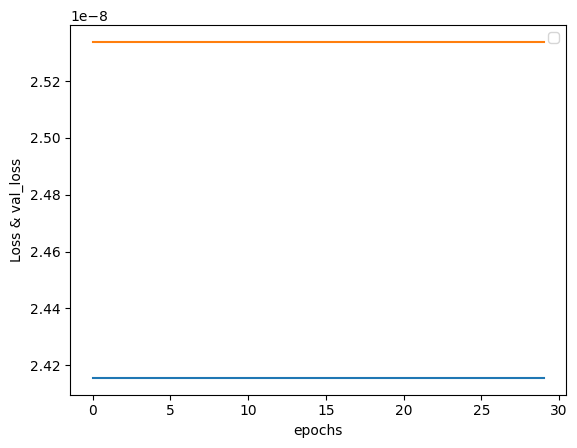

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4612 - loss: 2.4500e-08 - precision_26: 0.1955 - recall_26: 0.5208
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7920 - loss: 2.4367e-08 - precision_27: 0.2361 - recall_27: 0.0075 - val_accuracy: 0.7835 - val_loss: 2.5338e-08 - val_precision_27: 0.2222 - val_recall_27: 0.0074
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 2.4456e-08 - precision_27: 0.1914 - recall_27: 0.0070 - val_accuracy: 0.7835 - val_loss: 2.5338e-08 - val_precision_27: 0.2222 - val_recall_27: 0.0074
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7913 - loss: 2.4075e-08 - precision_27: 0.1652 - recall_27: 0.0085 - val_accuracy: 0.7835 - val_loss: 2.5338e-08 - val_precision_27: 0.2222 - val_recall_27: 0.0074
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 2.3457e-08 - precision_27: 0.2229 - recall_27: 0.0075 - val_accuracy: 0.7835 - val_loss: 2.5338e-08 - val_preci

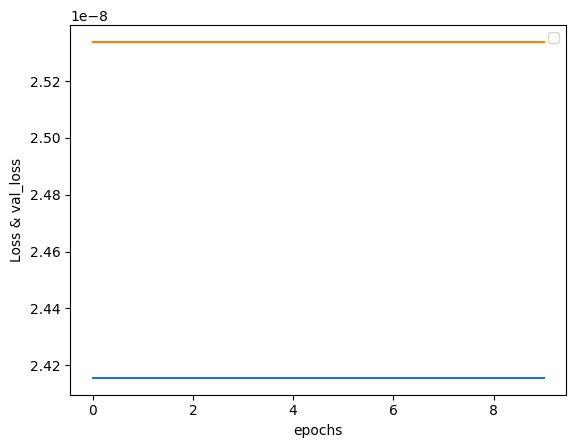

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7861 - loss: 2.4500e-08 - precision_27: 0.1480 - recall_27: 0.0083       
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7783 - loss: 2.4005e-08 - precision_28: 0.1142 - recall_28: 0.0156 - val_accuracy: 0.7765 - val_loss: 2.5338e-08 - val_precision_28: 0.2083 - val_recall_28: 0.0185
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7815 - loss: 2.3548e-08 - precision_28: 0.1911 - recall_28: 0.0333 - val_accuracy: 0.7765 - val_loss: 2.5338e-08 - val_precision_28: 0.2083 - val_recall_28: 0.0185
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7771 - loss: 2.4457e-08 - precision_28: 0.2023 - recall_28: 0.0269 - val_accuracy: 0.7765 - val_loss: 2.5338e-08 - val_precision_28: 0.2083 - val_recall_28: 0.0185
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7789 - loss: 2.3885e-08 - precision_28: 0.1275 - recall_28: 0.0191 - val_accuracy: 0.7765 - val_loss: 2.5338e-08 - va

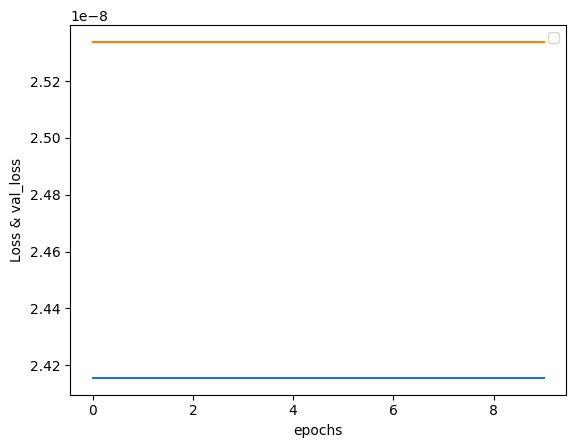

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7703 - loss: 2.4500e-08 - precision_28: 0.1871 - recall_28: 0.0351       
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6938 - loss: 2.4926e-08 - precision_29: 0.2614 - recall_29: 0.2533 - val_accuracy: 0.6902 - val_loss: 2.5338e-08 - val_precision_29: 0.2304 - val_recall_29: 0.1956
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6851 - loss: 2.4394e-08 - precision_29: 0.2332 - recall_29: 0.2366 - val_accuracy: 0.6902 - val_loss: 2.5338e-08 - val_precision_29: 0.2304 - val_recall_29: 0.1956
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6825 - loss: 2.4746e-08 - precision_29: 0.2327 - recall_29: 0.2314 - val_accuracy: 0.6902 - val_loss: 2.5338e-08 - val_precision_29: 0.2304 - val_recall_29: 0.1956
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6929 - loss: 2.4105e-08 - precision_29: 0.2391 - recall_29: 0.2378 - val_accuracy: 0.6902 - val_loss: 2.5338e-08 - va

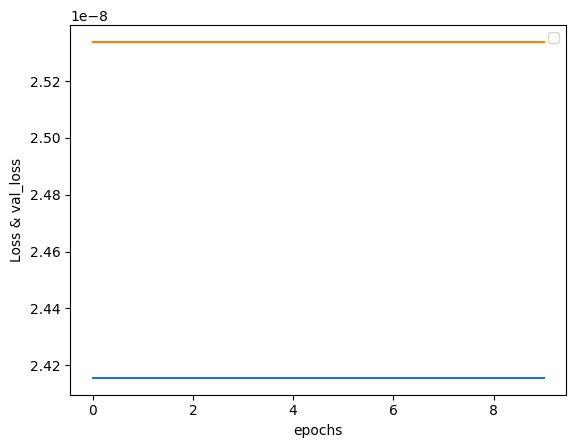

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6973 - loss: 2.4500e-08 - precision_29: 0.2334 - recall_29: 0.2062       
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7929 - loss: 2.3852e-08 - precision_30: 0.3454 - recall_30: 0.0415 - val_accuracy: 0.7851 - val_loss: 2.5338e-08 - val_precision_30: 0.4545 - val_recall_30: 0.0554
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7846 - loss: 2.4676e-08 - precision_30: 0.3098 - recall_30: 0.0336 - val_accuracy: 0.7851 - val_loss: 2.5338e-08 - val_precision_30: 0.4545 - val_recall_30: 0.0554
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 2.3626e-08 - precision_30: 0.2976 - recall_30: 0.0370 - val_accuracy: 0.7851 - val_loss: 2.5338e-08 - val_precision_30: 0.4545 - val_recall_30: 0.0554
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7907 - loss: 2.4126e-08 - precision_30: 0.3420 - recall_30: 0.0388 - val_accuracy: 0.7851 - val_loss: 2.5338e-08 - va

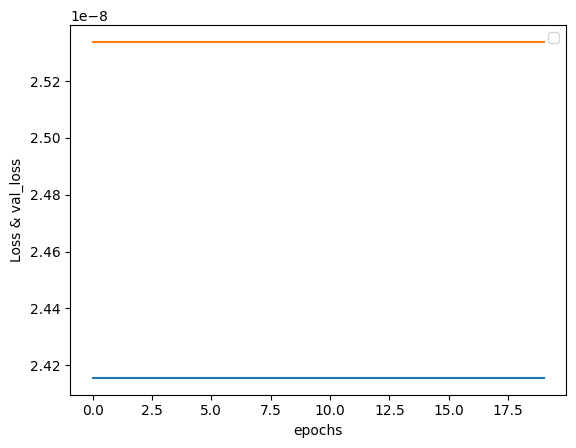

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7777 - loss: 2.4500e-08 - precision_30: 0.3287 - recall_30: 0.0773
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7991 - loss: 2.3639e-08 - precision_31: 0.4132 - recall_31: 0.0304 - val_accuracy: 0.7867 - val_loss: 2.5338e-08 - val_precision_31: 0.4762 - val_recall_31: 0.0369
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8003 - loss: 2.4010e-08 - precision_31: 0.5342 - recall_31: 0.0432 - val_accuracy: 0.7867 - val_loss: 2.5338e-08 - val_precision_31: 0.4762 - val_recall_31: 0.0369
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7934 - loss: 2.4121e-08 - precision_31: 0.3385 - recall_31: 0.0234 - val_accuracy: 0.7867 - val_loss: 2.5338e-08 - val_precision_31: 0.4762 - val_recall_31: 0.0369
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7971 - loss: 2.3924e-08 - precision_31: 0.4171 - recall_31: 0.0321 - val_accuracy: 0.7867 - val_loss: 2.5338e-08 - val_preci

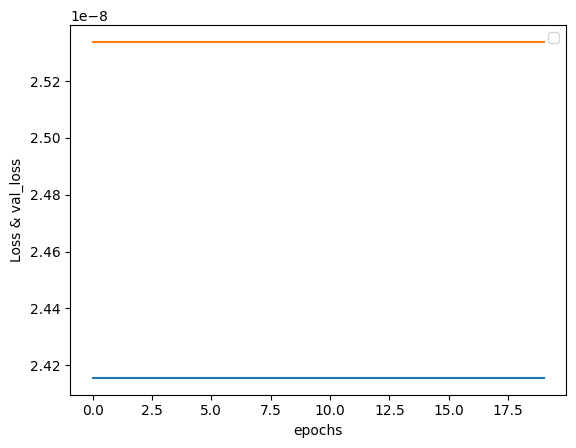

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7842 - loss: 2.4500e-08 - precision_31: 0.0826 - recall_31: 0.0055       
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7869 - loss: 2.3564e-08 - precision_32: 0.2325 - recall_32: 0.0333 - val_accuracy: 0.7592 - val_loss: 2.5338e-08 - val_precision_32: 0.1087 - val_recall_32: 0.0185
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7792 - loss: 2.3876e-08 - precision_32: 0.1825 - recall_32: 0.0298 - val_accuracy: 0.7592 - val_loss: 2.5338e-08 - val_precision_32: 0.1087 - val_recall_32: 0.0185
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7757 - loss: 2.4837e-08 - precision_32: 0.2298 - recall_32: 0.0334 - val_accuracy: 0.7592 - val_loss: 2.5338e-08 - val_precision_32: 0.1087 - val_recall_32: 0.0185
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7832 - loss: 2.3319e-08 - precision_32: 0.1547 - recall_32: 0.0243 - val_accuracy: 0.7592 - val_loss: 2.5338e-08 - v

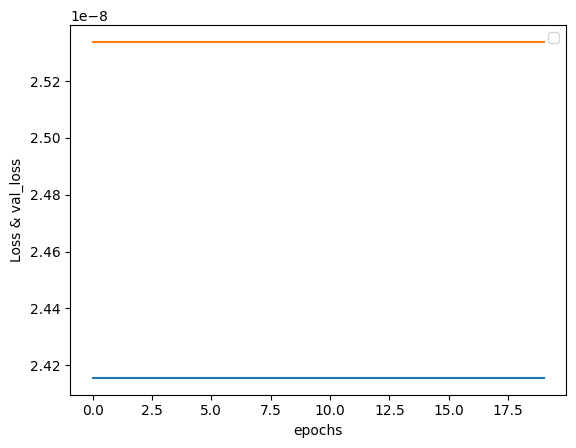

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7678 - loss: 2.4500e-08 - precision_32: 0.0531 - recall_32: 0.0078       
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7167 - loss: 2.4654e-08 - precision_33: 0.1732 - recall_33: 0.0981 - val_accuracy: 0.7043 - val_loss: 2.5338e-08 - val_precision_33: 0.1558 - val_recall_33: 0.0886
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7205 - loss: 2.3232e-08 - precision_33: 0.1643 - recall_33: 0.1064 - val_accuracy: 0.7043 - val_loss: 2.5338e-08 - val_precision_33: 0.1558 - val_recall_33: 0.0886
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7159 - loss: 2.3686e-08 - precision_33: 0.1486 - recall_33: 0.0894 - val_accuracy: 0.7043 - val_loss: 2.5338e-08 - val_precision_33: 0.1558 - val_recall_33: 0.0886
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7215 - loss: 2.3528e-08 - precision_33: 0.1560 - recall_33: 0.0938 - val_accuracy: 0.7043 - val_loss: 2.5338e-08 - va

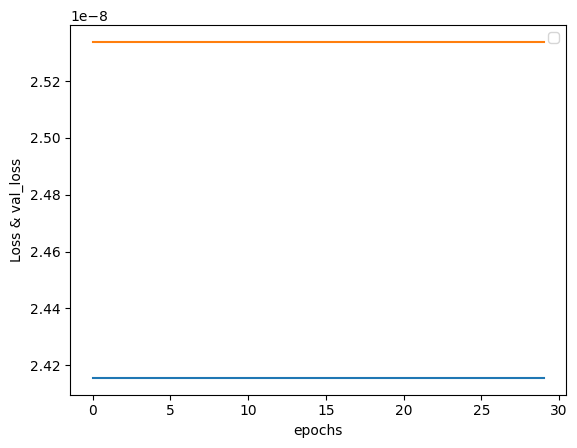

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7160 - loss: 2.4500e-08 - precision_33: 0.1489 - recall_33: 0.0817       
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7365 - loss: 2.3690e-08 - precision_34: 0.1474 - recall_34: 0.0668 - val_accuracy: 0.7278 - val_loss: 2.5338e-08 - val_precision_34: 0.1724 - val_recall_34: 0.0738
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7303 - loss: 2.5242e-08 - precision_34: 0.1920 - recall_34: 0.0857 - val_accuracy: 0.7278 - val_loss: 2.5338e-08 - val_precision_34: 0.1724 - val_recall_34: 0.0738
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7320 - loss: 2.4671e-08 - precision_34: 0.1650 - recall_34: 0.0719 - val_accuracy: 0.7278 - val_loss: 2.5338e-08 - val_precision_34: 0.1724 - val_recall_34: 0.0738
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7269 - loss: 2.4657e-08 - precision_34: 0.1573 - recall_34: 0.0736 - val_accuracy: 0.7278 - val_loss: 2.5338e-08 - va

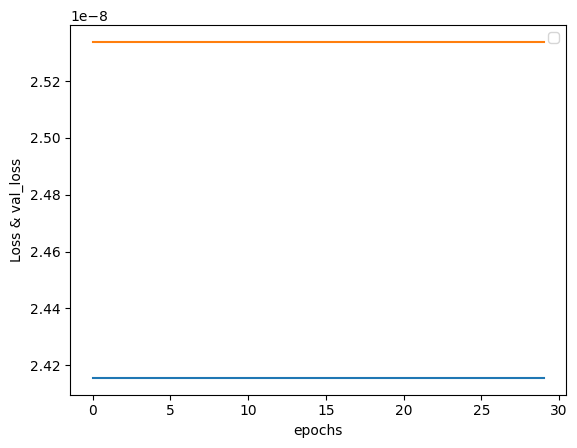

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7310 - loss: 2.4500e-08 - precision_34: 0.1878 - recall_34: 0.0904
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7947 - loss: 2.4469e-08 - precision_35: 0.4151 - recall_35: 0.0014 - val_accuracy: 0.7867 - val_loss: 2.5338e-08 - val_precision_35: 0.3333 - val_recall_35: 0.0037
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 2.4621e-08 - precision_35: 0.1633 - recall_35: 9.1760e-04 - val_accuracy: 0.7867 - val_loss: 2.5338e-08 - val_precision_35: 0.3333 - val_recall_35: 0.0037
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 2.3522e-08 - precision_35: 0.1968 - recall_35: 8.3051e-04 - val_accuracy: 0.7867 - val_loss: 2.5338e-08 - val_precision_35: 0.3333 - val_recall_35: 0.0037
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8022 - loss: 2.3458e-08 - precision_35: 0.0608 - recall_35: 2.4646e-04 - val_accuracy: 0.7867 - val_loss: 2.5338e-08

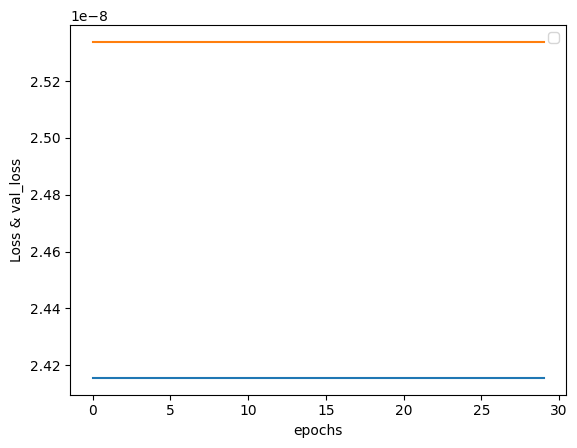

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 2.4500e-08 - precision_35: 0.0000e+00 - recall_35: 0.0000e+00
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7999 - loss: 2.3855e-08 - precision_36: 0.0000e+00 - recall_36: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_36: 0.0000e+00 - val_recall_36: 0.0000e+00
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7912 - loss: 2.4896e-08 - precision_36: 0.0000e+00 - recall_36: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_36: 0.0000e+00 - val_recall_36: 0.0000e+00
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7960 - loss: 2.4322e-08 - precision_36: 0.0000e+00 - recall_36: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_36: 0.0000e+00 - val_recall_36: 0.0000e+00
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 2.3981e-08 - precision_36: 0.0000e+00 - recall_36: 0.00

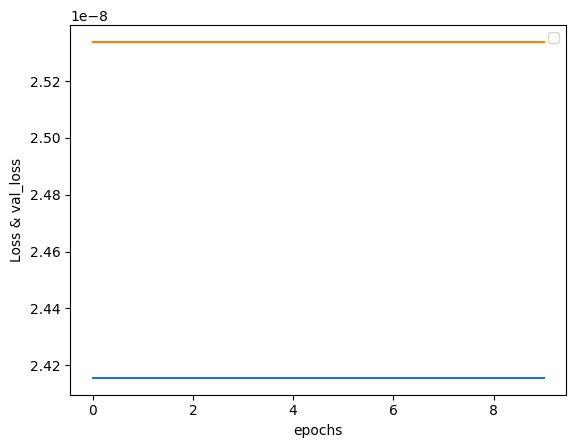

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7945 - loss: 2.4500e-08 - precision_36: 0.0000e+00 - recall_36: 0.0000e+00
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3828 - loss: 2.4090e-08 - precision_37: 0.2353 - recall_37: 0.9136 - val_accuracy: 0.4165 - val_loss: 2.5338e-08 - val_precision_37: 0.2569 - val_recall_37: 0.9225
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3845 - loss: 2.3878e-08 - precision_37: 0.2324 - recall_37: 0.8998 - val_accuracy: 0.4165 - val_loss: 2.5338e-08 - val_precision_37: 0.2569 - val_recall_37: 0.9225
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3840 - loss: 2.3970e-08 - precision_37: 0.2329 - recall_37: 0.8999 - val_accuracy: 0.4165 - val_loss: 2.5338e-08 - val_precision_37: 0.2569 - val_recall_37: 0.9225
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3855 - loss: 2.4417e-08 - precision_37: 0.2373 - recall_37: 0.9032 - val_accuracy: 0.4165 - val_loss: 2.5338e-08 - v

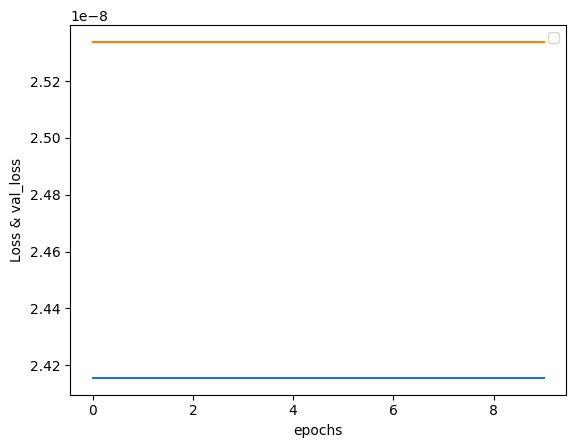

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3989 - loss: 2.4500e-08 - precision_37: 0.2441 - recall_37: 0.9171
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7489 - loss: 2.4610e-08 - precision_38: 0.1963 - recall_38: 0.0698 - val_accuracy: 0.7569 - val_loss: 2.5338e-08 - val_precision_38: 0.2651 - val_recall_38: 0.0812
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7520 - loss: 2.4400e-08 - precision_38: 0.1962 - recall_38: 0.0697 - val_accuracy: 0.7569 - val_loss: 2.5338e-08 - val_precision_38: 0.2651 - val_recall_38: 0.0812
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7583 - loss: 2.3989e-08 - precision_38: 0.2017 - recall_38: 0.0678 - val_accuracy: 0.7569 - val_loss: 2.5338e-08 - val_precision_38: 0.2651 - val_recall_38: 0.0812
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7421 - loss: 2.5049e-08 - precision_38: 0.1983 - recall_38: 0.0750 - val_accuracy: 0.7569 - val_loss: 2.5338e-08 - val_preci

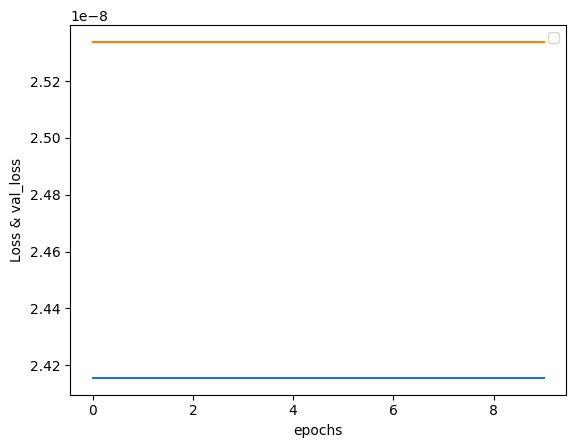

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7506 - loss: 2.4500e-08 - precision_38: 0.2003 - recall_38: 0.0688       
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2021 - loss: 2.4086e-08 - precision_39: 0.2021 - recall_39: 1.0000 - val_accuracy: 0.2125 - val_loss: 2.5338e-08 - val_precision_39: 0.2125 - val_recall_39: 1.0000
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2080 - loss: 2.4801e-08 - precision_39: 0.2080 - recall_39: 1.0000 - val_accuracy: 0.2125 - val_loss: 2.5338e-08 - val_precision_39: 0.2125 - val_recall_39: 1.0000
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1941 - loss: 2.3139e-08 - precision_39: 0.1941 - recall_39: 1.0000 - val_accuracy: 0.2125 - val_loss: 2.5338e-08 - val_precision_39: 0.2125 - val_recall_39: 1.0000
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2009 - loss: 2.3946e-08 - precision_39: 0.2009 - recall_39: 1.0000 - val_accuracy: 0.2125 - val_loss: 2.5338e-08 - va

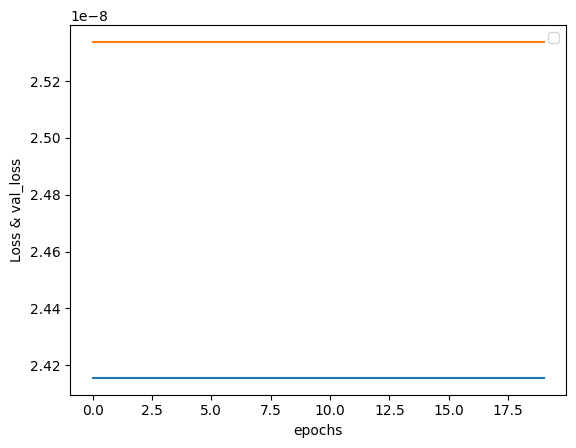

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2055 - loss: 2.4500e-08 - precision_39: 0.2055 - recall_39: 1.0000
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7936 - loss: 2.4610e-08 - precision_40: 0.0000e+00 - recall_40: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_40: 0.0000e+00 - val_recall_40: 0.0000e+00
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7946 - loss: 2.4481e-08 - precision_40: 0.0000e+00 - recall_40: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_40: 0.0000e+00 - val_recall_40: 0.0000e+00
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7976 - loss: 2.4131e-08 - precision_40: 0.0000e+00 - recall_40: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_40: 0.0000e+00 - val_recall_40: 0.0000e+00
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 2.4583e-08 - precision_40: 0.0000e+00 - recall_40: 0.0000e+00 -

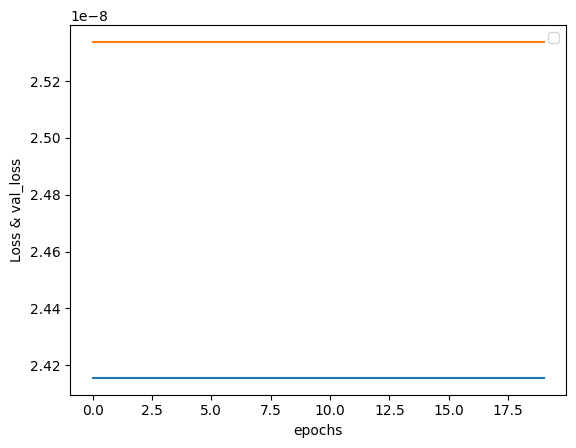

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 2.4500e-08 - precision_40: 0.0000e+00 - recall_40: 0.0000e+00
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8006 - loss: 2.3856e-08 - precision_41: 0.6477 - recall_41: 0.0106 - val_accuracy: 0.7882 - val_loss: 2.5338e-08 - val_precision_41: 1.0000 - val_recall_41: 0.0037
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7999 - loss: 2.3993e-08 - precision_41: 0.6767 - recall_41: 0.0108 - val_accuracy: 0.7882 - val_loss: 2.5338e-08 - val_precision_41: 1.0000 - val_recall_41: 0.0037
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 2.4856e-08 - precision_41: 0.6120 - recall_41: 0.0065 - val_accuracy: 0.7882 - val_loss: 2.5338e-08 - val_precision_41: 1.0000 - val_recall_41: 0.0037
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 2.4214e-08 - precision_41: 0.8174 - recall_41: 0.0073 - val_accuracy: 0.7882 - val_loss: 2.5338e-08 - v

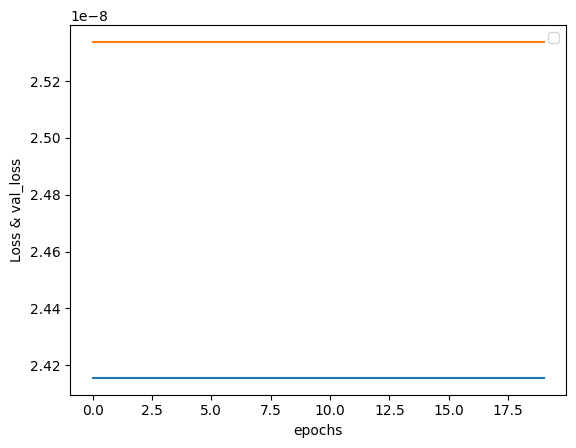

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7933 - loss: 2.4500e-08 - precision_41: 0.2847 - recall_41: 0.0028       
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7907 - loss: 2.3177e-08 - precision_42: 0.2202 - recall_42: 0.0288 - val_accuracy: 0.7725 - val_loss: 2.5338e-08 - val_precision_42: 0.2286 - val_recall_42: 0.0295
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7811 - loss: 2.4804e-08 - precision_42: 0.2762 - recall_42: 0.0322 - val_accuracy: 0.7725 - val_loss: 2.5338e-08 - val_precision_42: 0.2286 - val_recall_42: 0.0295
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7820 - loss: 2.4670e-08 - precision_42: 0.2648 - recall_42: 0.0292 - val_accuracy: 0.7725 - val_loss: 2.5338e-08 - val_precision_42: 0.2286 - val_recall_42: 0.0295
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7837 - loss: 2.4448e-08 - precision_42: 0.2661 - recall_42: 0.0324 - val_accuracy: 0.7725 - val_loss: 2.5338e-08 - va

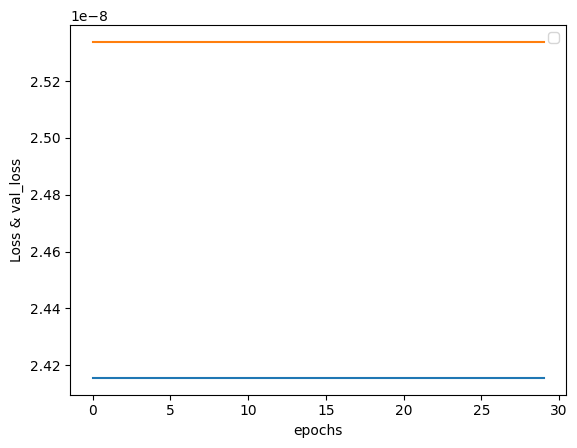

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7817 - loss: 2.4500e-08 - precision_42: 0.2650 - recall_42: 0.0363       
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7946 - loss: 2.4491e-08 - precision_43: 0.0000e+00 - recall_43: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_43: 0.0000e+00 - val_recall_43: 0.0000e+00
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7926 - loss: 2.4726e-08 - precision_43: 0.0000e+00 - recall_43: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_43: 0.0000e+00 - val_recall_43: 0.0000e+00
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8029 - loss: 2.3492e-08 - precision_43: 0.0000e+00 - recall_43: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_43: 0.0000e+00 - val_recall_43: 0.0000e+00
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 2.4354e-08 - precision_43: 0.0000e+00 - recall_43: 0.000

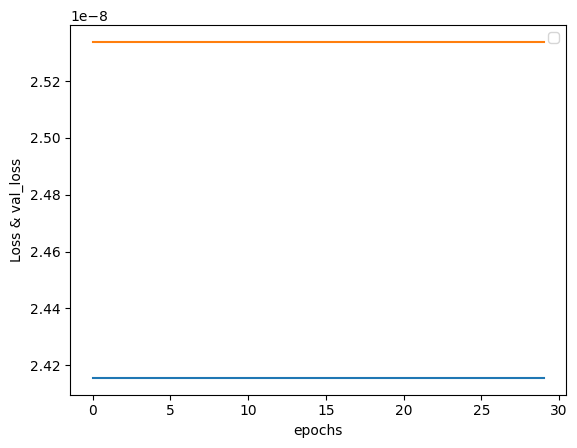

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 2.4500e-08 - precision_43: 0.0000e+00 - recall_43: 0.0000e+00
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7956 - loss: 2.4369e-08 - precision_44: 0.0000e+00 - recall_44: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_44: 0.0000e+00 - val_recall_44: 0.0000e+00
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7949 - loss: 2.4447e-08 - precision_44: 0.0000e+00 - recall_44: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_44: 0.0000e+00 - val_recall_44: 0.0000e+00
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8004 - loss: 2.3797e-08 - precision_44: 0.0000e+00 - recall_44: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_44: 0.0000e+00 - val_recall_44: 0.0000e+00
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7978 - loss: 2.4106e-08 - precision_44: 0.0000e+00 - recall_44: 0.00

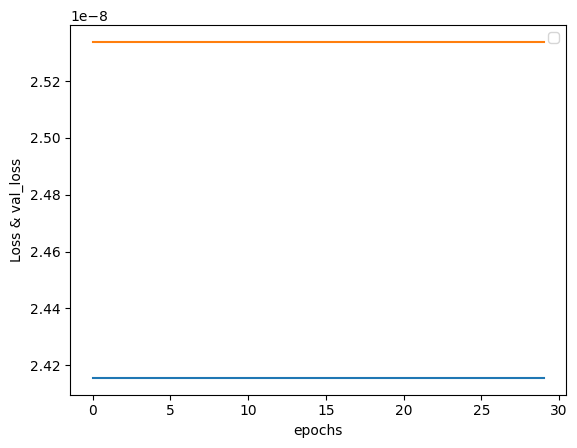

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 2.4500e-08 - precision_44: 0.0000e+00 - recall_44: 0.0000e+00
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7322 - loss: 2.4467e-08 - precision_45: 0.1916 - recall_45: 0.0954 - val_accuracy: 0.7184 - val_loss: 2.5338e-08 - val_precision_45: 0.1944 - val_recall_45: 0.1033
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7389 - loss: 2.3847e-08 - precision_45: 0.2014 - recall_45: 0.1031 - val_accuracy: 0.7184 - val_loss: 2.5338e-08 - val_precision_45: 0.1944 - val_recall_45: 0.1033
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7378 - loss: 2.3762e-08 - precision_45: 0.1880 - recall_45: 0.0954 - val_accuracy: 0.7184 - val_loss: 2.5338e-08 - val_precision_45: 0.1944 - val_recall_45: 0.1033
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7366 - loss: 2.3752e-08 - precision_45: 0.1887 - recall_45: 0.0972 - val_accuracy: 0.7184 - val_loss: 2.5338e-08 - v

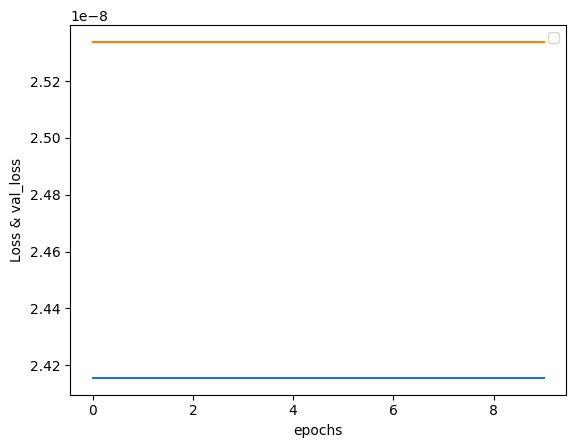

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7294 - loss: 2.4500e-08 - precision_45: 0.1835 - recall_45: 0.0954       
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7210 - loss: 2.4223e-08 - precision_46: 0.1128 - recall_46: 0.0547 - val_accuracy: 0.7106 - val_loss: 2.5338e-08 - val_precision_46: 0.1172 - val_recall_46: 0.0554
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7130 - loss: 2.4427e-08 - precision_46: 0.0905 - recall_46: 0.0443 - val_accuracy: 0.7106 - val_loss: 2.5338e-08 - val_precision_46: 0.1172 - val_recall_46: 0.0554
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7143 - loss: 2.4433e-08 - precision_46: 0.0970 - recall_46: 0.0468 - val_accuracy: 0.7106 - val_loss: 2.5338e-08 - val_precision_46: 0.1172 - val_recall_46: 0.0554
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7213 - loss: 2.3963e-08 - precision_46: 0.1103 - recall_46: 0.0543 - val_accuracy: 0.7106 - val_loss: 2.5338e-08 - va

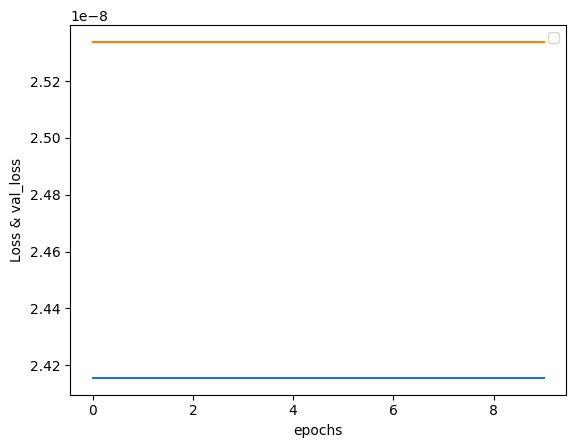

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 2.4500e-08 - precision_46: 0.0991 - recall_46: 0.0449       
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5602 - loss: 2.4291e-08 - precision_47: 0.2548 - recall_47: 0.6022 - val_accuracy: 0.5725 - val_loss: 2.5338e-08 - val_precision_47: 0.2739 - val_recall_47: 0.6125
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5671 - loss: 2.4486e-08 - precision_47: 0.2583 - recall_47: 0.5926 - val_accuracy: 0.5725 - val_loss: 2.5338e-08 - val_precision_47: 0.2739 - val_recall_47: 0.6125
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5506 - loss: 2.4536e-08 - precision_47: 0.2490 - recall_47: 0.5877 - val_accuracy: 0.5725 - val_loss: 2.5338e-08 - val_precision_47: 0.2739 - val_recall_47: 0.6125
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5665 - loss: 2.5125e-08 - precision_47: 0.2678 - recall_47: 0.6093 - val_accuracy: 0.5725 - val_loss: 2.5338e-08 - va

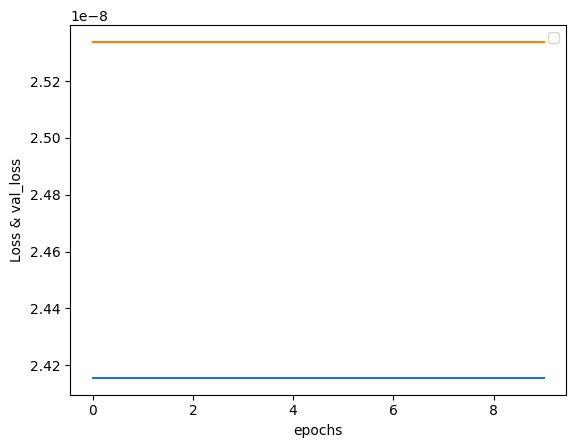

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5324 - loss: 2.4500e-08 - precision_47: 0.2427 - recall_47: 0.6011
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7913 - loss: 2.4006e-08 - precision_48: 0.2508 - recall_48: 0.0200 - val_accuracy: 0.7882 - val_loss: 2.5338e-08 - val_precision_48: 0.5263 - val_recall_48: 0.0369
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7840 - loss: 2.4598e-08 - precision_48: 0.2363 - recall_48: 0.0230 - val_accuracy: 0.7882 - val_loss: 2.5338e-08 - val_precision_48: 0.5263 - val_recall_48: 0.0369
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7858 - loss: 2.4462e-08 - precision_48: 0.2739 - recall_48: 0.0273 - val_accuracy: 0.7882 - val_loss: 2.5338e-08 - val_precision_48: 0.5263 - val_recall_48: 0.0369
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 2.3663e-08 - precision_48: 0.3044 - recall_48: 0.0317 - val_accuracy: 0.7882 - val_loss: 2.5338e-08 - val_preci

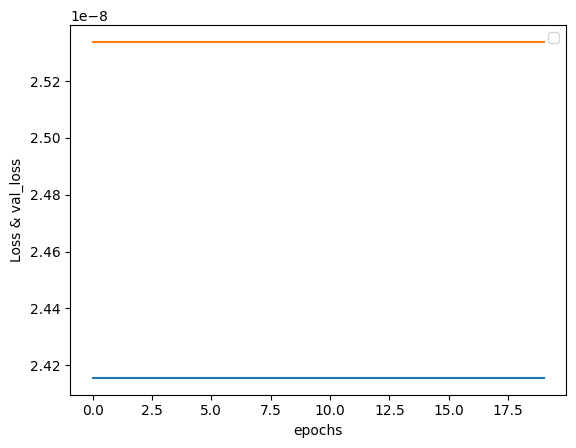

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7887 - loss: 2.4500e-08 - precision_48: 0.4173 - recall_48: 0.0788
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7526 - loss: 2.4389e-08 - precision_49: 0.1700 - recall_49: 0.0540 - val_accuracy: 0.7529 - val_loss: 2.5338e-08 - val_precision_49: 0.2179 - val_recall_49: 0.0627
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7581 - loss: 2.4057e-08 - precision_49: 0.1652 - recall_49: 0.0491 - val_accuracy: 0.7529 - val_loss: 2.5338e-08 - val_precision_49: 0.2179 - val_recall_49: 0.0627
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7568 - loss: 2.4816e-08 - precision_49: 0.2291 - recall_49: 0.0702 - val_accuracy: 0.7529 - val_loss: 2.5338e-08 - val_precision_49: 0.2179 - val_recall_49: 0.0627
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7474 - loss: 2.4958e-08 - precision_49: 0.1738 - recall_49: 0.0543 - val_accuracy: 0.7529 - val_loss: 2.5338e-08 - val_preci

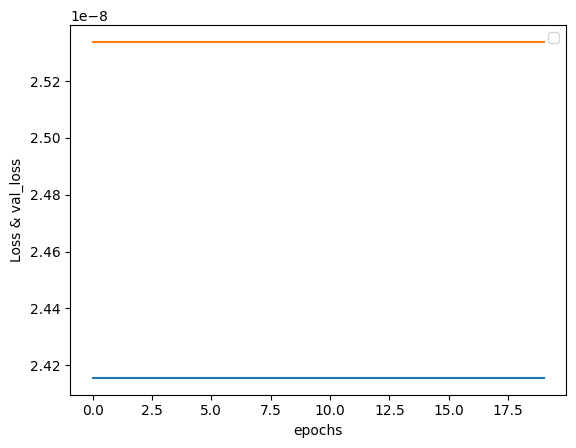

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7610 - loss: 2.4500e-08 - precision_49: 0.2187 - recall_49: 0.0642
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6875 - loss: 2.4714e-08 - precision_50: 0.1919 - recall_50: 0.1573 - val_accuracy: 0.6690 - val_loss: 2.5338e-08 - val_precision_50: 0.1553 - val_recall_50: 0.1255
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6877 - loss: 2.4417e-08 - precision_50: 0.1629 - recall_50: 0.1270 - val_accuracy: 0.6690 - val_loss: 2.5338e-08 - val_precision_50: 0.1553 - val_recall_50: 0.1255
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - loss: 2.4128e-08 - precision_50: 0.1672 - recall_50: 0.1395 - val_accuracy: 0.6690 - val_loss: 2.5338e-08 - val_precision_50: 0.1553 - val_recall_50: 0.1255
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6859 - loss: 2.3400e-08 - precision_50: 0.1568 - recall_50: 0.1372 - val_accuracy: 0.6690 - val_loss: 2.5338e-08 - val_preci

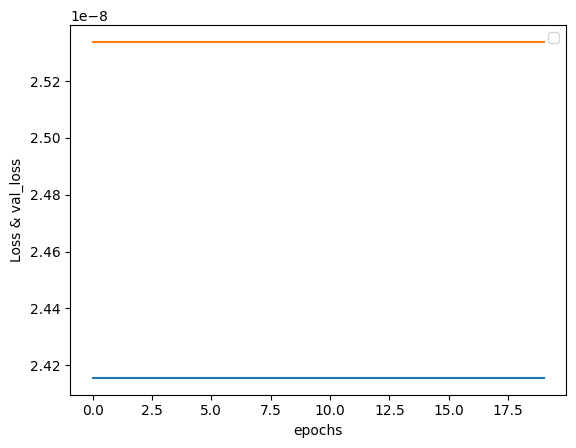

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6894 - loss: 2.4500e-08 - precision_50: 0.2239 - recall_50: 0.2082
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6493 - loss: 2.4728e-08 - precision_51: 0.1587 - recall_51: 0.1604 - val_accuracy: 0.6478 - val_loss: 2.5338e-08 - val_precision_51: 0.1799 - val_recall_51: 0.1845
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6554 - loss: 2.4020e-08 - precision_51: 0.1523 - recall_51: 0.1565 - val_accuracy: 0.6478 - val_loss: 2.5338e-08 - val_precision_51: 0.1799 - val_recall_51: 0.1845
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6596 - loss: 2.4479e-08 - precision_51: 0.1560 - recall_51: 0.1479 - val_accuracy: 0.6478 - val_loss: 2.5338e-08 - val_precision_51: 0.1799 - val_recall_51: 0.1845
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - loss: 2.4173e-08 - precision_51: 0.1641 - recall_51: 0.1647 - val_accuracy: 0.6478 - val_loss: 2.5338e-08 - val_preci

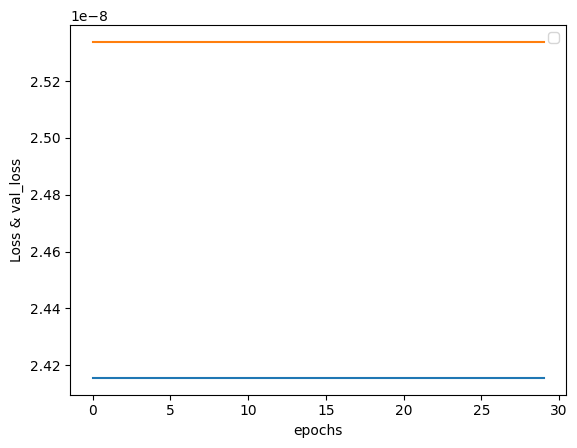

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6725 - loss: 2.4500e-08 - precision_51: 0.1818 - recall_51: 0.1702
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3268 - loss: 2.4288e-08 - precision_52: 0.1892 - recall_52: 0.7005 - val_accuracy: 0.3349 - val_loss: 2.5338e-08 - val_precision_52: 0.1960 - val_recall_52: 0.6863
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3427 - loss: 2.4532e-08 - precision_52: 0.1972 - recall_52: 0.7146 - val_accuracy: 0.3349 - val_loss: 2.5338e-08 - val_precision_52: 0.1960 - val_recall_52: 0.6863
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3325 - loss: 2.2933e-08 - precision_52: 0.1855 - recall_52: 0.7300 - val_accuracy: 0.3349 - val_loss: 2.5338e-08 - val_precision_52: 0.1960 - val_recall_52: 0.6863
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3365 - loss: 2.3597e-08 - precision_52: 0.1897 - recall_52: 0.7184 - val_accuracy: 0.3349 - val_loss: 2.5338e-08 - val_preci

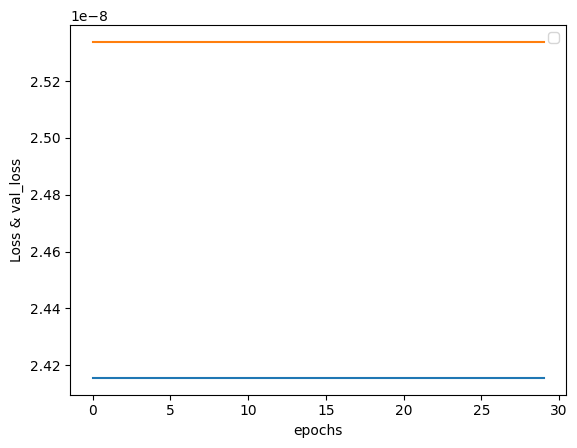

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3214 - loss: 2.4500e-08 - precision_52: 0.1816 - recall_52: 0.6564
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6899 - loss: 2.3955e-08 - precision_53: 0.2749 - recall_53: 0.3304 - val_accuracy: 0.6894 - val_loss: 2.5338e-08 - val_precision_53: 0.2776 - val_recall_53: 0.2878
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6947 - loss: 2.4945e-08 - precision_53: 0.2892 - recall_53: 0.3164 - val_accuracy: 0.6894 - val_loss: 2.5338e-08 - val_precision_53: 0.2776 - val_recall_53: 0.2878
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6843 - loss: 2.4541e-08 - precision_53: 0.2676 - recall_53: 0.3088 - val_accuracy: 0.6894 - val_loss: 2.5338e-08 - val_precision_53: 0.2776 - val_recall_53: 0.2878
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6909 - loss: 2.4113e-08 - precision_53: 0.2657 - recall_53: 0.3004 - val_accuracy: 0.6894 - val_loss: 2.5338e-08 - val_preci

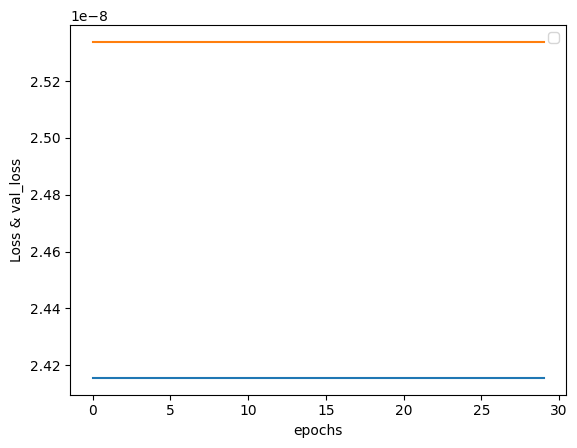

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6874 - loss: 2.4500e-08 - precision_53: 0.2596 - recall_53: 0.2826
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5861 - loss: 2.3702e-08 - precision_54: 0.1947 - recall_54: 0.3439 - val_accuracy: 0.5694 - val_loss: 2.5338e-08 - val_precision_54: 0.1952 - val_recall_54: 0.3284
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5922 - loss: 2.3965e-08 - precision_54: 0.2002 - recall_54: 0.3435 - val_accuracy: 0.5694 - val_loss: 2.5338e-08 - val_precision_54: 0.1952 - val_recall_54: 0.3284
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5824 - loss: 2.4860e-08 - precision_54: 0.2016 - recall_54: 0.3387 - val_accuracy: 0.5694 - val_loss: 2.5338e-08 - val_precision_54: 0.1952 - val_recall_54: 0.3284
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5948 - loss: 2.3426e-08 - precision_54: 0.2030 - recall_54: 0.3633 - val_accuracy: 0.5694 - val_loss: 2.5338e-08 - val_preci

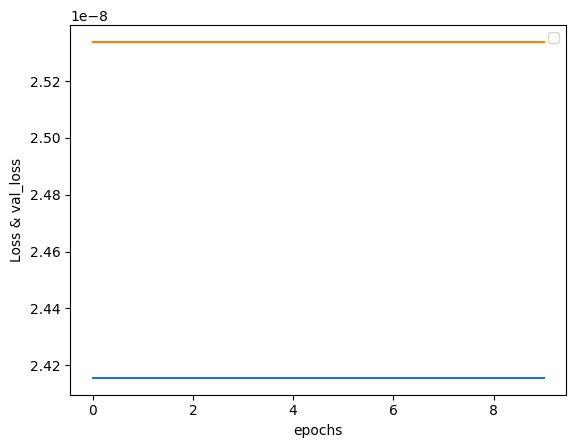

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5815 - loss: 2.4500e-08 - precision_54: 0.2075 - recall_54: 0.3680
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7793 - loss: 2.3743e-08 - precision_55: 0.3042 - recall_55: 0.0846 - val_accuracy: 0.7631 - val_loss: 2.5338e-08 - val_precision_55: 0.2754 - val_recall_55: 0.0701
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7739 - loss: 2.4401e-08 - precision_55: 0.3233 - recall_55: 0.0952 - val_accuracy: 0.7631 - val_loss: 2.5338e-08 - val_precision_55: 0.2754 - val_recall_55: 0.0701
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7657 - loss: 2.5146e-08 - precision_55: 0.3107 - recall_55: 0.0937 - val_accuracy: 0.7631 - val_loss: 2.5338e-08 - val_precision_55: 0.2754 - val_recall_55: 0.0701
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7741 - loss: 2.4212e-08 - precision_55: 0.3088 - recall_55: 0.0915 - val_accuracy: 0.7631 - val_loss: 2.5338e-08 - val_preci

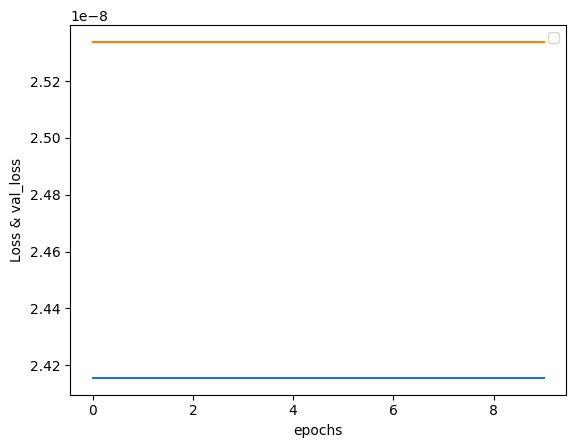

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7757 - loss: 2.4500e-08 - precision_55: 0.3386 - recall_55: 0.0975       
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5936 - loss: 2.3937e-08 - precision_56: 0.1619 - recall_56: 0.2453 - val_accuracy: 0.5631 - val_loss: 2.5338e-08 - val_precision_56: 0.1595 - val_recall_56: 0.2472
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5694 - loss: 2.5476e-08 - precision_56: 0.1478 - recall_56: 0.2132 - val_accuracy: 0.5631 - val_loss: 2.5338e-08 - val_precision_56: 0.1595 - val_recall_56: 0.2472
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5869 - loss: 2.3543e-08 - precision_56: 0.1398 - recall_56: 0.2115 - val_accuracy: 0.5631 - val_loss: 2.5338e-08 - val_precision_56: 0.1595 - val_recall_56: 0.2472
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5898 - loss: 2.3984e-08 - precision_56: 0.1503 - recall_56: 0.2232 - val_accuracy: 0.5631 - val_loss: 2.5338e-08 - va

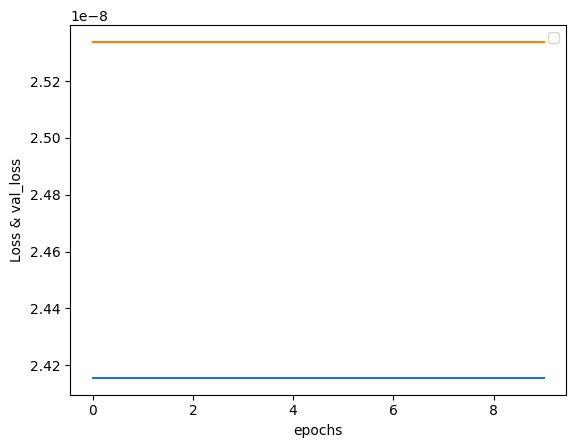

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5757 - loss: 2.4500e-08 - precision_56: 0.1229 - recall_56: 0.1732
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6793 - loss: 2.4887e-08 - precision_57: 0.1989 - recall_57: 0.1771 - val_accuracy: 0.6784 - val_loss: 2.5338e-08 - val_precision_57: 0.2116 - val_recall_57: 0.1882
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6778 - loss: 2.5017e-08 - precision_57: 0.2101 - recall_57: 0.1942 - val_accuracy: 0.6784 - val_loss: 2.5338e-08 - val_precision_57: 0.2116 - val_recall_57: 0.1882
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6844 - loss: 2.3369e-08 - precision_57: 0.1725 - recall_57: 0.1604 - val_accuracy: 0.6784 - val_loss: 2.5338e-08 - val_precision_57: 0.2116 - val_recall_57: 0.1882
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - loss: 2.4725e-08 - precision_57: 0.1815 - recall_57: 0.1646 - val_accuracy: 0.6784 - val_loss: 2.5338e-08 - val_preci

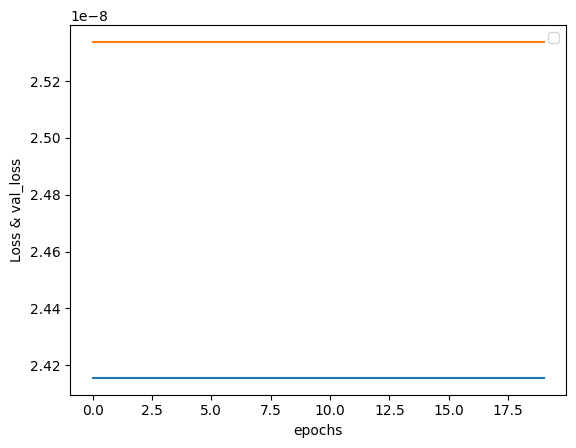

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6908 - loss: 2.4500e-08 - precision_57: 0.1874 - recall_57: 0.1529       
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7838 - loss: 2.3734e-08 - precision_58: 0.3814 - recall_58: 0.1411 - val_accuracy: 0.7765 - val_loss: 2.5338e-08 - val_precision_58: 0.4054 - val_recall_58: 0.1107
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7746 - loss: 2.4214e-08 - precision_58: 0.3564 - recall_58: 0.1319 - val_accuracy: 0.7765 - val_loss: 2.5338e-08 - val_precision_58: 0.4054 - val_recall_58: 0.1107
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7825 - loss: 2.4275e-08 - precision_58: 0.4037 - recall_58: 0.1404 - val_accuracy: 0.7765 - val_loss: 2.5338e-08 - val_precision_58: 0.4054 - val_recall_58: 0.1107
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7832 - loss: 2.3813e-08 - precision_58: 0.3844 - recall_58: 0.1421 - val_accuracy: 0.7765 - val_loss: 2.5338e-08 - va

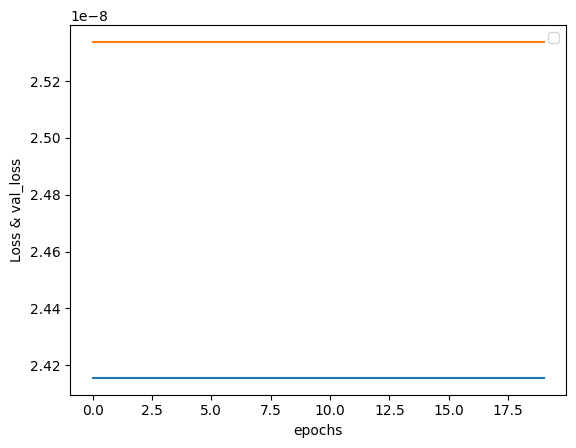

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7679 - loss: 2.4500e-08 - precision_58: 0.3199 - recall_58: 0.1171
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8022 - loss: 2.3492e-08 - precision_59: 0.0000e+00 - recall_59: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_59: 0.0000e+00 - val_recall_59: 0.0000e+00
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8027 - loss: 2.3460e-08 - precision_59: 0.0000e+00 - recall_59: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_59: 0.0000e+00 - val_recall_59: 0.0000e+00
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7970 - loss: 2.4145e-08 - precision_59: 0.0000e+00 - recall_59: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_59: 0.0000e+00 - val_recall_59: 0.0000e+00
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7952 - loss: 2.4367e-08 - precision_59: 0.0000e+00 - recall_59: 0.0000e+00 -

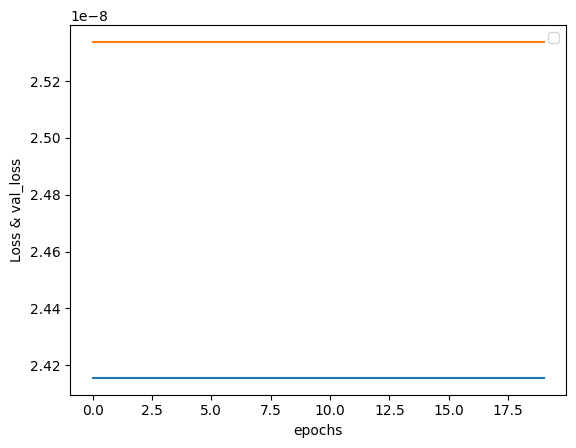

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 2.4500e-08 - precision_59: 0.0000e+00 - recall_59: 0.0000e+00
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4571 - loss: 2.3565e-08 - precision_60: 0.1502 - recall_60: 0.3754 - val_accuracy: 0.4471 - val_loss: 2.5338e-08 - val_precision_60: 0.1771 - val_recall_60: 0.4391
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4544 - loss: 2.3534e-08 - precision_60: 0.1599 - recall_60: 0.4140 - val_accuracy: 0.4471 - val_loss: 2.5338e-08 - val_precision_60: 0.1771 - val_recall_60: 0.4391
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4623 - loss: 2.5519e-08 - precision_60: 0.1845 - recall_60: 0.4405 - val_accuracy: 0.4471 - val_loss: 2.5338e-08 - val_precision_60: 0.1771 - val_recall_60: 0.4391
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4549 - loss: 2.4117e-08 - precision_60: 0.1613 - recall_60: 0.4042 - val_accuracy: 0.4471 - val_loss: 2.5338e-08 - v

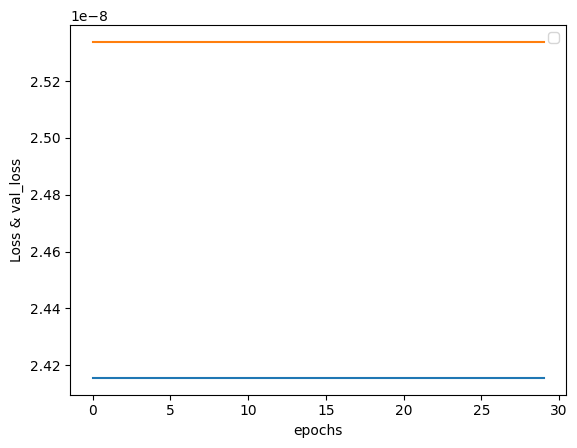

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4356 - loss: 2.4500e-08 - precision_60: 0.1660 - recall_60: 0.4346
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8058 - loss: 2.3154e-08 - precision_61: 0.0000e+00 - recall_61: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_61: 0.0000e+00 - val_recall_61: 0.0000e+00
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7928 - loss: 2.4699e-08 - precision_61: 0.0000e+00 - recall_61: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_61: 0.0000e+00 - val_recall_61: 0.0000e+00
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 2.5075e-08 - precision_61: 0.0000e+00 - recall_61: 0.0000e+00 - val_accuracy: 0.7875 - val_loss: 2.5338e-08 - val_precision_61: 0.0000e+00 - val_recall_61: 0.0000e+00
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7999 - loss: 2.3850e-08 - precision_61: 0.0000e+00 - recall_61: 0.0000e+00 -

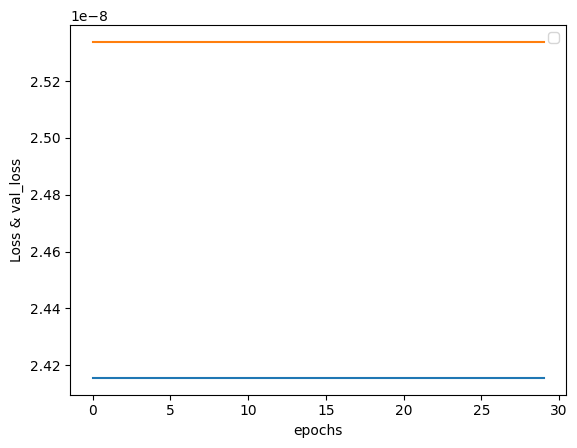

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 2.4500e-08 - precision_61: 0.0000e+00 - recall_61: 0.0000e+00
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1908 - loss: 2.2763e-08 - precision_62: 0.1841 - recall_62: 0.9428 - val_accuracy: 0.2125 - val_loss: 2.5338e-08 - val_precision_62: 0.2061 - val_recall_62: 0.9483
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2046 - loss: 2.4136e-08 - precision_62: 0.1961 - recall_62: 0.9448 - val_accuracy: 0.2125 - val_loss: 2.5338e-08 - val_precision_62: 0.2061 - val_recall_62: 0.9483
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2087 - loss: 2.4392e-08 - precision_62: 0.1995 - recall_62: 0.9517 - val_accuracy: 0.2125 - val_loss: 2.5338e-08 - val_precision_62: 0.2061 - val_recall_62: 0.9483
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2027 - loss: 2.3710e-08 - precision_62: 0.1928 - recall_62: 0.9441 - val_accuracy: 0.2125 - val_loss: 2.5338e-08 - v

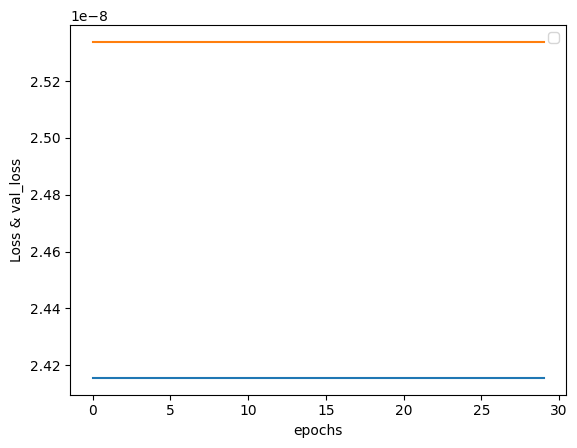

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2140 - loss: 2.4500e-08 - precision_62: 0.2032 - recall_62: 0.9668
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5453 - loss: 2.4144e-08 - precision_63: 0.1619 - recall_63: 0.2990 - val_accuracy: 0.5435 - val_loss: 2.5338e-08 - val_precision_63: 0.1896 - val_recall_63: 0.3506
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5369 - loss: 2.5188e-08 - precision_63: 0.1708 - recall_63: 0.3098 - val_accuracy: 0.5435 - val_loss: 2.5338e-08 - val_precision_63: 0.1896 - val_recall_63: 0.3506
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5560 - loss: 2.4737e-08 - precision_63: 0.1820 - recall_63: 0.3254 - val_accuracy: 0.5435 - val_loss: 2.5338e-08 - val_precision_63: 0.1896 - val_recall_63: 0.3506
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5488 - loss: 2.3290e-08 - precision_63: 0.1603 - recall_63: 0.3062 - val_accuracy: 0.5435 - val_loss: 2.5338e-08 - val_preci

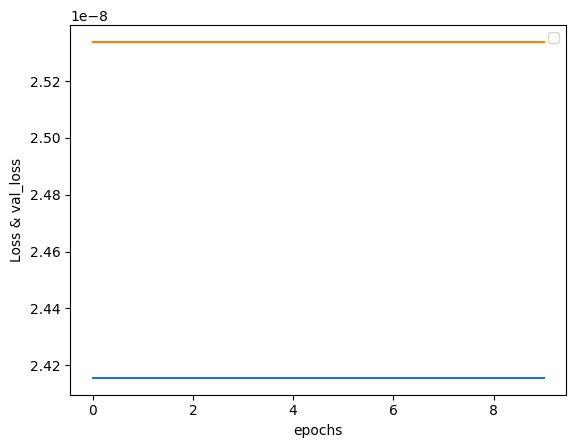

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5547 - loss: 2.4500e-08 - precision_63: 0.1572 - recall_63: 0.2677
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7383 - loss: 2.4561e-08 - precision_64: 0.3831 - recall_64: 0.4418 - val_accuracy: 0.7420 - val_loss: 2.5338e-08 - val_precision_64: 0.3957 - val_recall_64: 0.4059
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7415 - loss: 2.4102e-08 - precision_64: 0.3749 - recall_64: 0.4175 - val_accuracy: 0.7420 - val_loss: 2.5338e-08 - val_precision_64: 0.3957 - val_recall_64: 0.4059
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7372 - loss: 2.3860e-08 - precision_64: 0.3658 - recall_64: 0.4209 - val_accuracy: 0.7420 - val_loss: 2.5338e-08 - val_precision_64: 0.3957 - val_recall_64: 0.4059
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7339 - loss: 2.3506e-08 - precision_64: 0.3515 - recall_64: 0.4126 - val_accuracy: 0.7420 - val_loss: 2.5338e-08 - val_preci

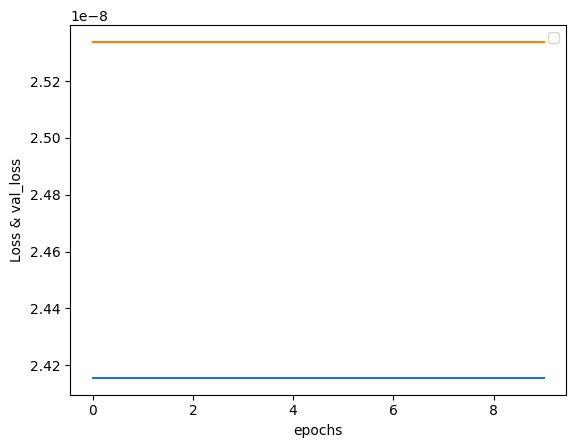

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7274 - loss: 2.4500e-08 - precision_64: 0.3564 - recall_64: 0.4061
Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6769 - loss: 2.4355e-08 - precision_65: 0.2644 - recall_65: 0.3252 - val_accuracy: 0.6902 - val_loss: 2.5338e-08 - val_precision_65: 0.3050 - val_recall_65: 0.3579
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - loss: 2.4050e-08 - precision_65: 0.2860 - recall_65: 0.3589 - val_accuracy: 0.6902 - val_loss: 2.5338e-08 - val_precision_65: 0.3050 - val_recall_65: 0.3579
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6711 - loss: 2.4317e-08 - precision_65: 0.2579 - recall_65: 0.3264 - val_accuracy: 0.6902 - val_loss: 2.5338e-08 - val_precision_65: 0.3050 - val_recall_65: 0.3579
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6791 - loss: 2.3652e-08 - precision_65: 0.2699 - recall_65: 0.3622 - val_accuracy: 0.6902 - val_loss: 2.5338e-08 - val_preci

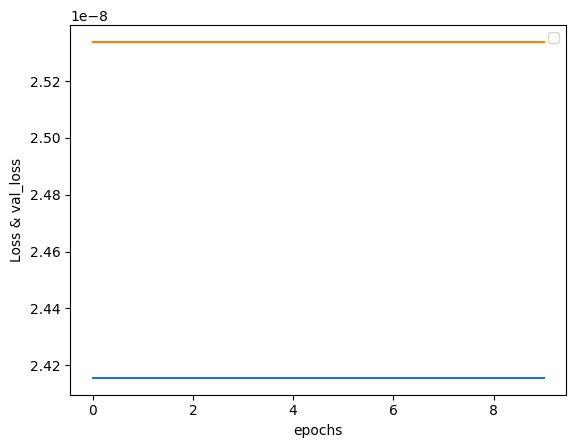

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6576 - loss: 2.4500e-08 - precision_65: 0.2626 - recall_65: 0.3682
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6937 - loss: 2.4579e-08 - precision_66: 0.3167 - recall_66: 0.4194 - val_accuracy: 0.7020 - val_loss: 2.5338e-08 - val_precision_66: 0.3248 - val_recall_66: 0.3727
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6861 - loss: 2.3665e-08 - precision_66: 0.2915 - recall_66: 0.4057 - val_accuracy: 0.7020 - val_loss: 2.5338e-08 - val_precision_66: 0.3248 - val_recall_66: 0.3727
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6899 - loss: 2.4234e-08 - precision_66: 0.3004 - recall_66: 0.3947 - val_accuracy: 0.7020 - val_loss: 2.5338e-08 - val_precision_66: 0.3248 - val_recall_66: 0.3727
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6987 - loss: 2.3924e-08 - precision_66: 0.3072 - recall_66: 0.4000 - val_accuracy: 0.7020 - val_loss: 2.5338e-08 - val_preci

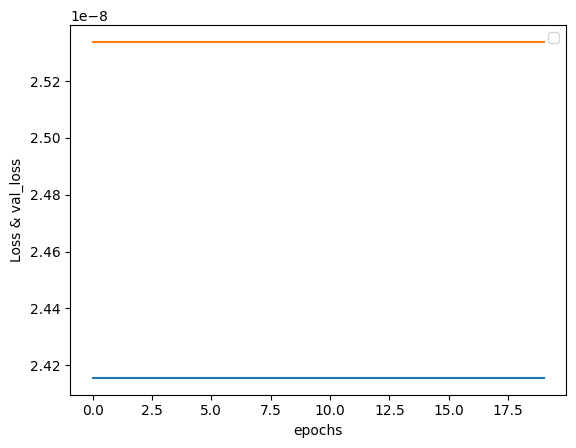

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6773 - loss: 2.4500e-08 - precision_66: 0.2863 - recall_66: 0.3818
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6915 - loss: 2.4844e-08 - precision_67: 0.1846 - recall_67: 0.1418 - val_accuracy: 0.6965 - val_loss: 2.5338e-08 - val_precision_67: 0.2157 - val_recall_67: 0.1624
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7080 - loss: 2.4039e-08 - precision_67: 0.1998 - recall_67: 0.1490 - val_accuracy: 0.6965 - val_loss: 2.5338e-08 - val_precision_67: 0.2157 - val_recall_67: 0.1624
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6920 - loss: 2.4137e-08 - precision_67: 0.1758 - recall_67: 0.1407 - val_accuracy: 0.6965 - val_loss: 2.5338e-08 - val_precision_67: 0.2157 - val_recall_67: 0.1624
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7043 - loss: 2.3563e-08 - precision_67: 0.1846 - recall_67: 0.1445 - val_accuracy: 0.6965 - val_loss: 2.5338e-08 - val_preci

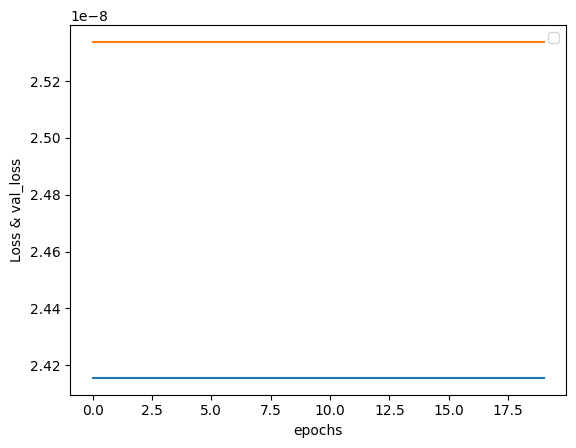

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7178 - loss: 2.4500e-08 - precision_67: 0.2303 - recall_67: 0.1562
Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5554 - loss: 2.4760e-08 - precision_68: 0.2594 - recall_68: 0.6155 - val_accuracy: 0.5710 - val_loss: 2.5338e-08 - val_precision_68: 0.2637 - val_recall_68: 0.5683
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5540 - loss: 2.5344e-08 - precision_68: 0.2617 - recall_68: 0.6029 - val_accuracy: 0.5710 - val_loss: 2.5338e-08 - val_precision_68: 0.2637 - val_recall_68: 0.5683
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5471 - loss: 2.4597e-08 - precision_68: 0.2542 - recall_68: 0.6187 - val_accuracy: 0.5710 - val_loss: 2.5338e-08 - val_precision_68: 0.2637 - val_recall_68: 0.5683
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5535 - loss: 2.4137e-08 - precision_68: 0.2551 - recall_68: 0.6288 - val_accuracy: 0.5710 - val_loss: 2.5338e-08 - val_preci

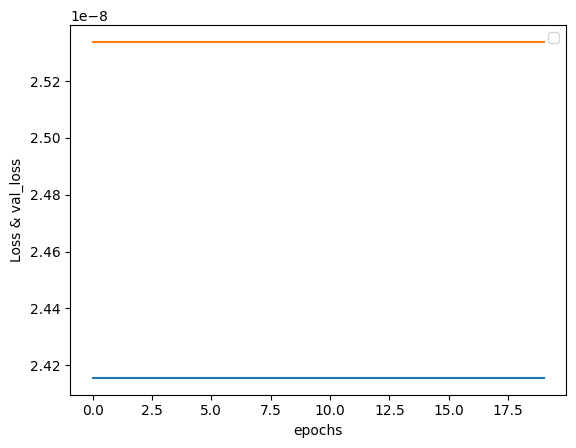

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5495 - loss: 2.4500e-08 - precision_68: 0.2576 - recall_68: 0.6335
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7988 - loss: 2.3504e-08 - precision_69: 0.4554 - recall_69: 0.1042 - val_accuracy: 0.7780 - val_loss: 2.5338e-08 - val_precision_69: 0.4167 - val_recall_69: 0.1107
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 2.3687e-08 - precision_69: 0.4578 - recall_69: 0.1009 - val_accuracy: 0.7780 - val_loss: 2.5338e-08 - val_precision_69: 0.4167 - val_recall_69: 0.1107
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7955 - loss: 2.3520e-08 - precision_69: 0.4221 - recall_69: 0.1047 - val_accuracy: 0.7780 - val_loss: 2.5338e-08 - val_precision_69: 0.4167 - val_recall_69: 0.1107
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7914 - loss: 2.4196e-08 - precision_69: 0.4376 - recall_69: 0.0923 - val_accuracy: 0.7780 - val_loss: 2.5338e-08 - val_preci

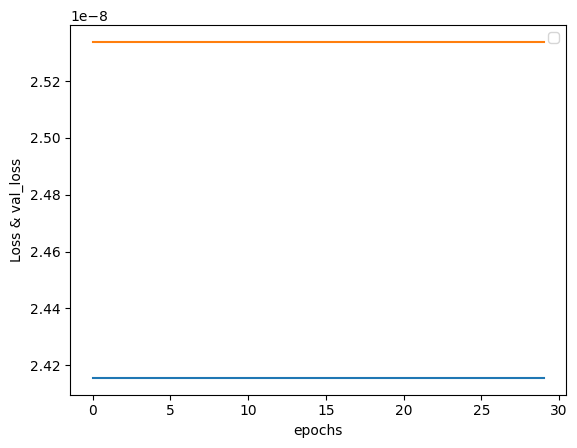

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7936 - loss: 2.4500e-08 - precision_69: 0.4844 - recall_69: 0.0995
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6845 - loss: 2.4947e-08 - precision_70: 0.1280 - recall_70: 0.0871 - val_accuracy: 0.6863 - val_loss: 2.5338e-08 - val_precision_70: 0.1726 - val_recall_70: 0.1255
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6879 - loss: 2.3842e-08 - precision_70: 0.1135 - recall_70: 0.0819 - val_accuracy: 0.6863 - val_loss: 2.5338e-08 - val_precision_70: 0.1726 - val_recall_70: 0.1255
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - loss: 2.3961e-08 - precision_70: 0.1247 - recall_70: 0.0888 - val_accuracy: 0.6863 - val_loss: 2.5338e-08 - val_precision_70: 0.1726 - val_recall_70: 0.1255
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6828 - loss: 2.4272e-08 - precision_70: 0.1063 - recall_70: 0.0758 - val_accuracy: 0.6863 - val_loss: 2.5338e-08 - val_preci

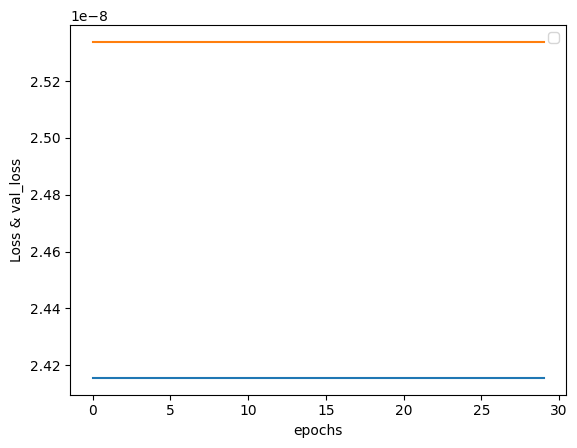

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6887 - loss: 2.4500e-08 - precision_70: 0.1710 - recall_70: 0.1357
Epoch 1/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6235 - loss: 2.4858e-08 - precision_71: 0.2523 - recall_71: 0.4106 - val_accuracy: 0.6376 - val_loss: 2.5338e-08 - val_precision_71: 0.2774 - val_recall_71: 0.4391
Epoch 2/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6278 - loss: 2.3868e-08 - precision_71: 0.2518 - recall_71: 0.4360 - val_accuracy: 0.6376 - val_loss: 2.5338e-08 - val_precision_71: 0.2774 - val_recall_71: 0.4391
Epoch 3/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6318 - loss: 2.3433e-08 - precision_71: 0.2551 - recall_71: 0.4554 - val_accuracy: 0.6376 - val_loss: 2.5338e-08 - val_precision_71: 0.2774 - val_recall_71: 0.4391
Epoch 4/30
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6320 - loss: 2.3852e-08 - precision_71: 0.2573 - recall_71: 0.4448 - val_accuracy: 0.6376 - val_loss: 2.5338e-08 - val_preci

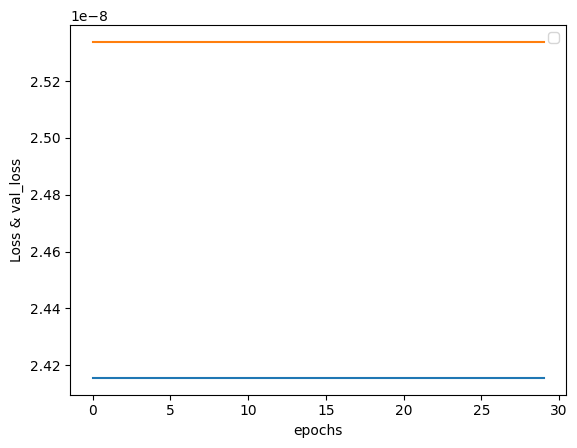

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6497 - loss: 2.4500e-08 - precision_71: 0.2776 - recall_71: 0.4389


In [ ]:

epochs=[10,20,30]
activations=['sigmoid','relu']
rates=[0.1,0.01,0.001]
layers=[1,2,3]
rslt=[]
for layer in layers:
    for i in activations:
        for j in epochs:
            for k in rates:
                model=Sequential()
                model.add(Input(shape=(11,),name='Input'))
                if layer==1:
                    model.add(Dense(units=128,activation=i,name='d1'))
                elif layer==2:
                    model.add(Dense(units=64,activation=i,name='d2'))
                else :
                    model.add(Dense(units=32,activation=i,name='d3'))
                model.add(Dense(1))
                #[plotting of 
                model.compile(optimizer=Adam(learning_rate=k),loss='categorical_crossentropy',metrics=['accuracy',Precision(),Recall()])
                m=model.fit(X_train,y_train,batch_size=32,epochs=j,validation_split=0.15)
                print('loss,val_loss vs epochs')
                plt.plot(m.history['loss'],label='Train Loss')
                plt.plot(m.history['val_loss'],label='Validation Loss')
                plt.ylabel('Loss & val_loss')
                plt.xlabel('epochs')
                plt.show()
                plt.legend()
                plt.title('Loss vs epochs')
                loss, accuracy, precision, recall=model.evaluate(X_test,y_test, batch_size=32)
                rslt.append([layer,i,j,k,loss,accuracy,precision,recall])








                
   

In [ ]:
!pip install tabulate

/bin/bash: /home/jac/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [ ]:
headers=['Layers','Activation','Epochs','Learning rate','Test Loss','Test Accuracy','Test precision','Test Recall']
from tabulate import tabulate
#tabulate()

In [ ]:
print(tabulate(rslt,headers=headers,tablefmt='grid'))

+----------+--------------+----------+-----------------+-------------+-----------------+------------------+---------------+
|   Layers | Activation   |   Epochs |   Learning rate |   Test Loss |   Test Accuracy |   Test precision |   Test Recall |
+==========+==============+==========+=================+=============+=================+==================+===============+
|        1 | sigmoid      |       10 |           0.1   | 2.40008e-08 |        0.788    |        0.362069  |    0.0695364  |
+----------+--------------+----------+-----------------+-------------+-----------------+------------------+---------------+
|        1 | sigmoid      |       10 |           0.01  | 2.40008e-08 |        0.688667 |        0.193309  |    0.172185   |
+----------+--------------+----------+-----------------+-------------+-----------------+------------------+---------------+
|        1 | sigmoid      |       10 |           0.001 | 2.40008e-08 |        0.201333 |        0.201333  |    1          |
+-------

In [ ]:
from keras.layers import MaxPool2D,Conv2D,Dense,Flatten
from keras.models import Sequential

In [ ]:
m =Sequential([
    Conv2D(6,kernel_size=(5,5),padding='same',strides=(1,1), input_shape =(28,28,1), activation='tanh'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='valid'),
    Conv2D(16,kernel_size=(5,5),strides=1,activation='tanh',padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
print(m.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,173 (16.30 KB)

 Trainable params: 4,173 (16.30 KB)

 Non-trainable params: 0 (0.00 B)

None
